In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [111]:
Admission_data = pd.read_csv('Admission_Predict_Ver1.1.csv')
Admission_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [112]:
Admission_data.drop(['Serial No.'],axis = 1,inplace=True)
Admission_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [113]:
Admission_data.rename(columns = {'Serial No.': 'SerialNo', 'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'University Rating': 'UniversityRating', 'LOR ': 'LOR', 'Chance of Admit ': 'Chance'}, inplace=True)
Admission_data.head()

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [114]:
Admission_data['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

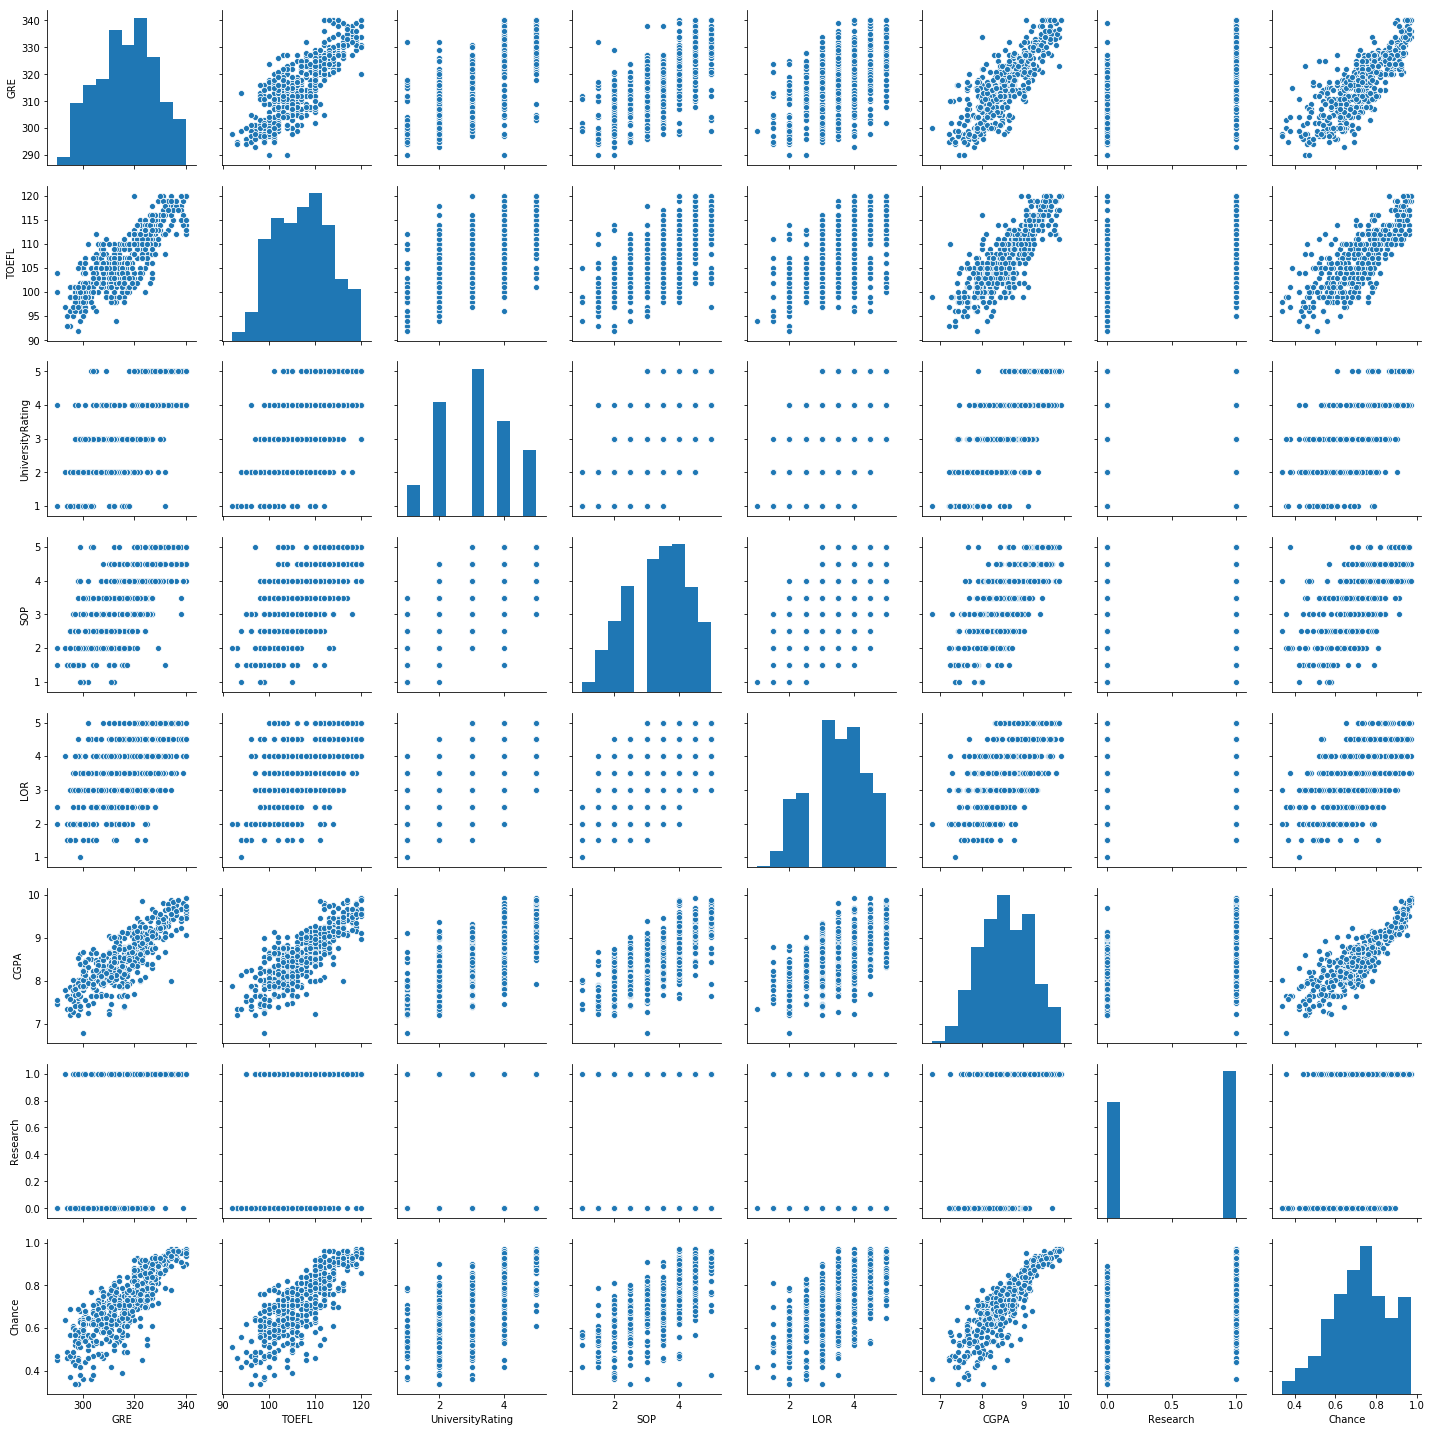

In [115]:
sns.pairplot(Admission_data)

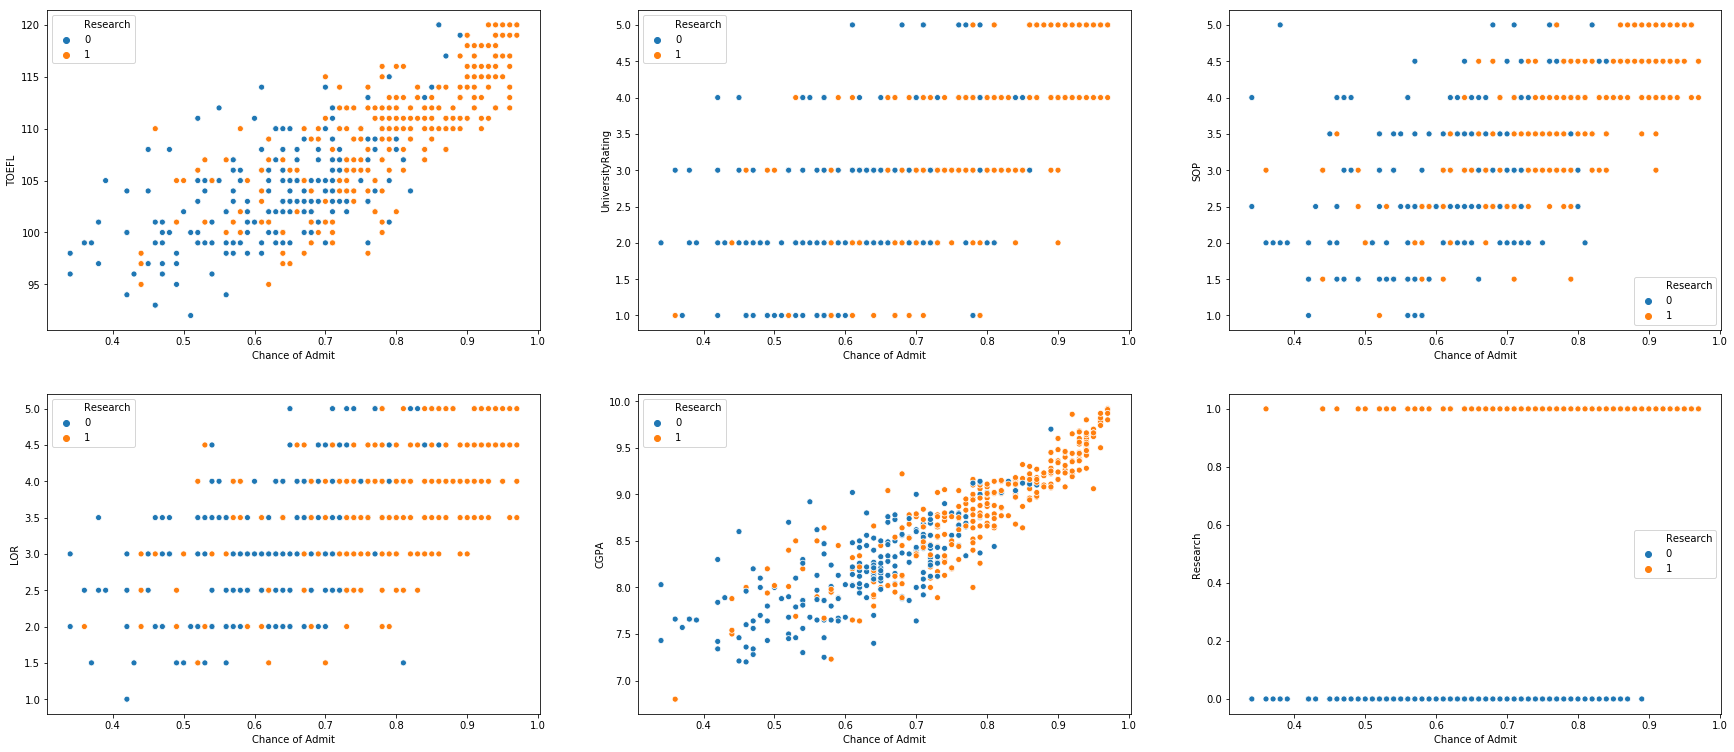

In [116]:
fig = plt.figure(figsize=(30,20))
for i in range(1,7):
    ax = fig.add_subplot(3,3,i)
    sns.scatterplot(x=Admission_data['Chance'],y=Admission_data.iloc[:,i],hue=Admission_data['Research'])
    plt.xlabel('Chance of Admit')
    plt.ylabel(Admission_data.columns[i])

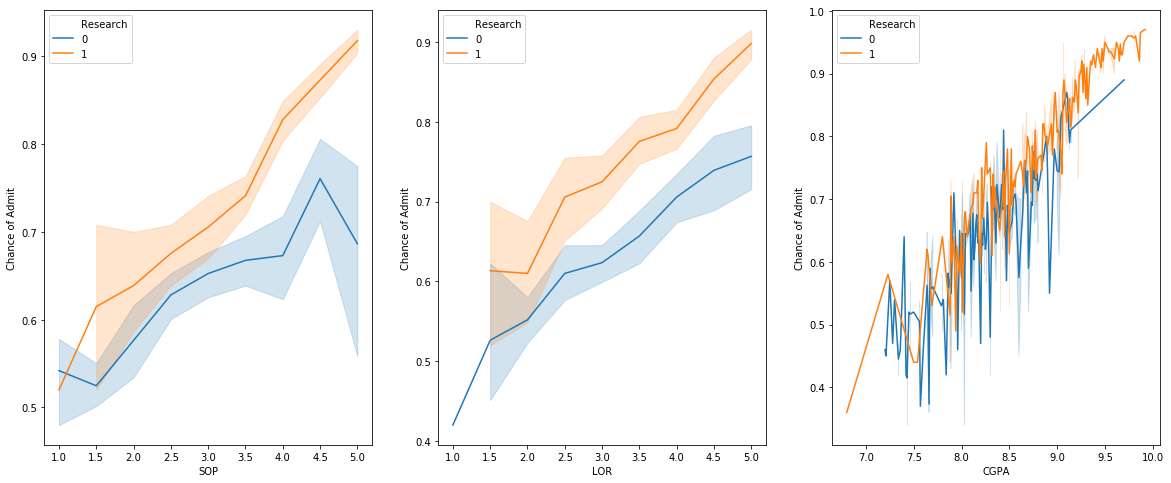

In [117]:
fig = plt.figure(figsize=(20,8))
for i in range(1,4):
    ax = fig.add_subplot(1,3,i)
    sns.lineplot(x=Admission_data.iloc[:,i+2],y=Admission_data['Chance'],hue=Admission_data['Research'])
    plt.xlabel(Admission_data.columns[i+2])
    plt.ylabel('Chance of Admit')

In [118]:
def missing_values(Admission_data):
    missing_values_sum = Admission_data.isnull().sum()
    missing_values_percentage = (missing_values_sum / len(Admission_data)) *100
    missing_val_table = pd.concat([missing_values_sum, missing_values_percentage], axis=1)
    missing_val_table = missing_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    missing_val_table = missing_val_table[missing_val_table.iloc[:,1]!=0]
    missing_val_table.sort_values(['% of Total Values'], ascending=[True]).round(1)
    print("Your selected dataframe has " + str(Admission_data.shape[1]) + " columns.\n"      
        "There are " + str(missing_val_table.shape[0]) +
              " columns that have missing values.")
    return missing_val_table


In [119]:
missing_values(Admission_data)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [120]:
#Outliners

for i in Admission_data.columns:
    first_quarter = Admission_data[i].describe()['25%']
    third_quarter = Admission_data[i].describe()['75%']
    intermediate = third_quarter - first_quarter
    Admission_data = Admission_data[(Admission_data[i] > (first_quarter - 3 * intermediate)) &
                                    (Admission_data[i] < (third_quarter + 3 * intermediate))]

In [121]:
Admission_data.corr()['Chance'].sort_values(ascending=[False])

Chance              1.000000
CGPA                0.882413
GRE                 0.810351
TOEFL               0.792228
UniversityRating    0.690132
SOP                 0.684137
LOR                 0.645365
Research            0.545871
Name: Chance, dtype: float64

In [122]:
features = Admission_data.loc[:,'GRE':'Research']
targets = Admission_data['Chance']
print(features,targets)

     GRE  TOEFL  UniversityRating  SOP  LOR  CGPA  Research
0    337    118                 4  4.5  4.5  9.65         1
1    324    107                 4  4.0  4.5  8.87         1
2    316    104                 3  3.0  3.5  8.00         1
3    322    110                 3  3.5  2.5  8.67         1
4    314    103                 2  2.0  3.0  8.21         0
5    330    115                 5  4.5  3.0  9.34         1
6    321    109                 3  3.0  4.0  8.20         1
7    308    101                 2  3.0  4.0  7.90         0
8    302    102                 1  2.0  1.5  8.00         0
9    323    108                 3  3.5  3.0  8.60         0
10   325    106                 3  3.5  4.0  8.40         1
11   327    111                 4  4.0  4.5  9.00         1
12   328    112                 4  4.0  4.5  9.10         1
13   307    109                 3  4.0  3.0  8.00         1
14   311    104                 3  3.5  2.0  8.20         1
15   314    105                 3  3.5  

In [123]:
X_train,X_test,y_train,y_test = train_test_split(features, targets, test_size = 0.2, random_state = 49)

In [124]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 7)
(100, 7)
(400,)
(100,)


In [125]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [126]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()
X_train = standardscaler.fit_transform(X_train)
X_test = standardscaler.transform(X_test)

c:\users\hpadmin\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\hpadmin\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\hpadmin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [127]:
from sklearn.preprocessing import MinMaxScaler, Imputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Create an imputer object with a median filling strategy
imputer = Imputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

c:\users\hpadmin\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [128]:
y_train = np.array(y_train).reshape((-1,))
y_test = np.array(y_test).reshape((-1,))
print(y_train, y_test)

[0.9  0.84 0.86 0.64 0.94 0.53 0.8  0.74 0.58 0.71 0.82 0.64 0.59 0.79
 0.5  0.58 0.75 0.71 0.74 0.72 0.78 0.46 0.71 0.76 0.95 0.66 0.75 0.61
 0.74 0.78 0.77 0.49 0.54 0.56 0.94 0.71 0.45 0.65 0.52 0.63 0.64 0.7
 0.7  0.81 0.75 0.68 0.96 0.57 0.78 0.95 0.72 0.75 0.7  0.66 0.65 0.79
 0.68 0.92 0.94 0.81 0.71 0.92 0.96 0.73 0.73 0.69 0.92 0.84 0.64 0.64
 0.9  0.82 0.76 0.67 0.7  0.76 0.56 0.43 0.94 0.89 0.53 0.94 0.8  0.83
 0.81 0.66 0.95 0.89 0.52 0.81 0.69 0.71 0.61 0.9  0.73 0.65 0.76 0.68
 0.64 0.91 0.94 0.96 0.39 0.72 0.72 0.71 0.62 0.86 0.51 0.7  0.72 0.93
 0.62 0.7  0.62 0.8  0.71 0.94 0.67 0.56 0.72 0.85 0.74 0.79 0.8  0.67
 0.82 0.78 0.44 0.58 0.65 0.91 0.64 0.85 0.67 0.9  0.96 0.58 0.53 0.65
 0.92 0.48 0.59 0.64 0.62 0.84 0.72 0.71 0.79 0.77 0.61 0.85 0.68 0.97
 0.93 0.67 0.47 0.86 0.86 0.74 0.52 0.85 0.61 0.81 0.7  0.47 0.9  0.66
 0.88 0.71 0.65 0.93 0.71 0.62 0.74 0.45 0.86 0.76 0.62 0.73 0.8  0.59
 0.57 0.92 0.42 0.73 0.87 0.87 0.74 0.82 0.56 0.77 0.74 0.65 0.48 0.7
 0.54 0.

In [129]:
def model_fit_evaluate(model):
    model.fit(X_train,y_train)
    predections = model.predict(X_test)
    model_evaluation = mean_absolute_error(y_test, predections)
    return model_evaluation

In [130]:
#LinearRegression
linear_regression = LinearRegression()
linear_regression_mae = model_fit_evaluate(linear_regression)
linear_regression_mae = str.format('{0:.4f}', linear_regression_mae)
print(f'Linear Regression Performance on the test set: MAE = {linear_regression_mae}')

Linear Regression Performance on the test set: MAE = 0.0401


In [131]:
random_forest_regressor = RandomForestRegressor(n_estimators=10)
random_forest_regressor_mae = model_fit_evaluate(random_forest_regressor)
random_forest_regressor_mae = str.format('{0:.4f}', random_forest_regressor_mae)
print(f'Random Forest Regressor Performance on the test set: MAE = {random_forest_regressor_mae}')

Random Forest Regressor Performance on the test set: MAE = 0.0444


In [132]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = model_fit_evaluate(svm)
svm_mae = str.format('{0:.4f}', svm_mae)
print(f'Support Vector Machine Regression Performance on the test set: MAE = {svm_mae}')

Support Vector Machine Regression Performance on the test set: MAE = 0.0556


In [133]:
gradient_boosting_regressor = GradientBoostingRegressor(random_state=60)
gradient_boosting_regressor_mae = model_fit_evaluate(gradient_boosting_regressor)
gradient_boosting_regressor_mae = str.format('{0:.4f}', gradient_boosting_regressor_mae)
print(f'Gradient Boosting Regressor Performance on the test set: MAE = {gradient_boosting_regressor_mae}')

Gradient Boosting Regressor Performance on the test set: MAE = 0.0395


In [134]:
k_neighbors_regressor = KNeighborsRegressor(n_neighbors=10)
k_neighbors_regressor_mae = model_fit_evaluate(k_neighbors_regressor)
k_neighbors_regressor_mae = str.format('{0:.4f}', k_neighbors_regressor_mae)
print(f'K neighbors Regressor Performance on the test set: MAE = {k_neighbors_regressor_mae}')

K neighbors Regressor Performance on the test set: MAE = 0.0460


Text(0.5, 1.0, 'Model Comparison on Test MAE')

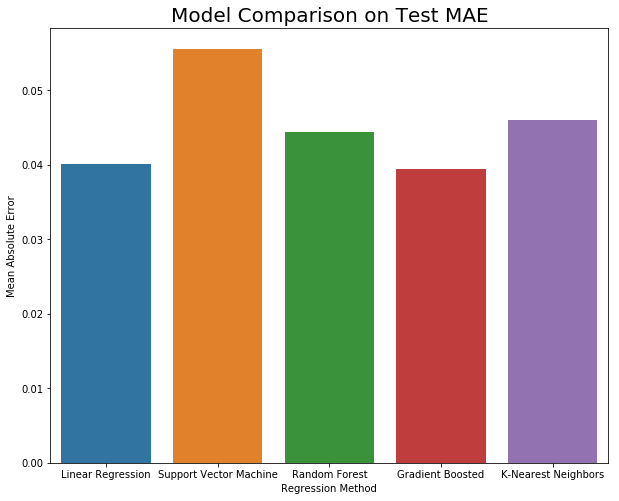

In [135]:
fig = plt.figure(figsize=(10,8))
model_comparison = pd.DataFrame({'Model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [linear_regression_mae, svm_mae, random_forest_regressor_mae, 
                                         gradient_boosting_regressor_mae, k_neighbors_regressor_mae]})

model_comparison['mae']=model_comparison['mae'].astype('float')
sns.barplot(x='Model',y='mae',data=model_comparison)
plt.xlabel('Regression Method')
plt.ylabel('Mean Absolute Error')
plt.title('Model Comparison on Test MAE', size = 20)

In [136]:
# Hyper Parameter Optimisation
# Here we will implement RandomSearchCv and GridSearchCv to find the best parameters for model

#Number of trees for boosting process
n_estimators = [100, 500, 900, 1100, 1500]

#Max Depth of tree
max_depth = [2, 3, 5, 10, 15]

#Minimum number of samples to split at node
min_samples_split = [2, 4, 6, 10]

#Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

#Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

#Loss function to be optimized
loss = ['ls', 'lad', 'huber']

hyperparameter_grid = {
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features,
    'loss':loss
}

In [137]:
# RandomSearchCv
#    estimator: the model
#    param_distributions: the distribution of parameters we defined
#    cv the number of folds to use for k-fold cross validation
#    n_iter: the number of different combinations to try
#    scoring: which metric to use when evaluating candidates
#    n_jobs: number of cores to run in parallel (-1 will use all available)
#    verbose: how much information to display (1 displays a limited amount)
#    return_train_score: return the training score for each cross-validation fold
#    random_state: fixes the random number generator used so we get the same results every run

from sklearn.model_selection import RandomizedSearchCV
model = GradientBoostingRegressor(random_state = 60)
random_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = hyperparameter_grid,
    cv = 4,
    n_iter = 25,
    scoring = 'neg_mean_absolute_error',
    n_jobs = -1,
    verbose = 1,
    return_train_score = True,
    random_state = 60,
)
random_search.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=60, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_split': [2, 4, 6, 10], 'min_samples_leaf': [1, 2, 4, 6, 8], 'max_features': ['auto', 'sqrt', 'log2', None], 'loss': ['ls', 'lad', 'huber']},
          pre_dispatch='2*n_jobs', random_state=60, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

In [138]:
random_search.cv_results_

{'mean_fit_time': array([ 0.81900144,  1.41960251, 12.14362776,  0.31250066,  0.75330478,
         1.28220224,  0.32030052,  1.1814025 ,  1.83755124,  0.40727329,
         1.97393811,  1.81666505,  1.8587535 ,  2.2657541 ,  0.05875015,
         0.34370071,  0.23060042, 14.23808587,  0.68010134,  0.11360025,
         0.7108013 ,  2.04270369,  3.85910785,  3.4132604 ,  0.45555615]),
 'std_fit_time': array([0.01351004, 0.02918512, 0.52308053, 0.09896692, 0.04294011,
        0.05305883, 0.03389566, 0.08466694, 0.05789097, 0.01229661,
        0.08146857, 0.1627181 , 0.0635374 , 0.09239624, 0.00691142,
        0.01033588, 0.00588888, 0.19088974, 0.00833019, 0.00651765,
        0.05460922, 0.03377492, 0.27875381, 0.16494661, 0.05464248]),
 'mean_score_time': array([0.00390005, 0.        , 0.0159502 , 0.00390005, 0.00389999,
        0.        , 0.00390005, 0.        , 0.00400025, 0.00325018,
        0.00389999, 0.        , 0.        , 0.        , 0.00389999,
        0.00780004, 0.        , 0.0

In [139]:
random_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=2,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=60,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [140]:
# The following are the best parameters

n_estimators=100
max_depth=2
min_samples_split=2
min_samples_leaf=2
loss='huber'
max_features=None
random_state=60

In [141]:
from sklearn.model_selection import GridSearchCV
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = loss, max_depth = max_depth,
                                  min_samples_leaf = 2,
                                  min_samples_split = 2,
                                  max_features = None,
                                  random_state = 60)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   19.7s finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=2,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_sa...       subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [142]:
grid_search.cv_results_

{'mean_fit_time': array([0.12285084, 0.1868512 , 0.2504012 , 0.36770105, 0.37930077,
        0.46120089, 0.59666878, 0.78644156, 0.822797  , 0.82729733,
        0.80859369, 0.83126509, 0.97022021, 0.96045887, 1.10622156]),
 'std_fit_time': array([0.0159624 , 0.012519  , 0.02542031, 0.14014452, 0.03436207,
        0.05863179, 0.12661959, 0.03090014, 0.03588636, 0.04689292,
        0.0584554 , 0.0560951 , 0.1387601 , 0.09417746, 0.08783644]),
 'mean_score_time': array([0.00440001, 0.        , 0.        , 0.00389999, 0.        ,
        0.00389999, 0.00075012, 0.00124997, 0.00150001, 0.00150001,
        0.00175005, 0.        , 0.00075001, 0.00050002, 0.00050002]),
 'std_score_time': array([0.00705556, 0.        , 0.        , 0.00675498, 0.        ,
        0.00675498, 0.00082929, 0.00043295, 0.00050008, 0.00050008,
        0.00043308, 0.        , 0.00082919, 0.00086607, 0.00086607]),
 'param_n_estimators': masked_array(data=[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600,
         

In [143]:
grid_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=2,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=60,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [144]:
# Comparing the scores
default_model = GradientBoostingRegressor(random_state=60)
default_model.fit(X_train, y_train)
default_model_predections = default_model.predict(X_test)
default_model_mae = mean_absolute_error(y_test, default_model_predections)
print(f'For default model MAE  is : {default_model_mae}')

final_model = grid_search.best_estimator_
final_model = GradientBoostingRegressor(random_state=60)
final_model.fit(X_train, y_train)
final_model_predections = final_model.predict(X_test)
final_model_mae = mean_absolute_error(y_test, final_model_predections)
print(f'For final model MAE  is : {final_model_mae}')

For default model MAE  is : 0.03954861111479731
For final model MAE  is : 0.03954861111479731


Text(0.5, 1.0, 'Residuals (error)')

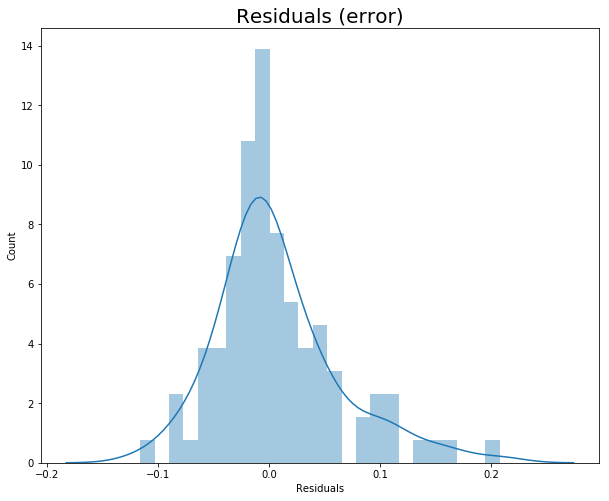

In [145]:
# plotting for residuals
fig = plt.figure(figsize=(10,8))
residuals = final_model_predections - y_test
sns.distplot(residuals,bins=25)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Residuals (error)', size = 20)
# it looks like there is 90% normalisation

Text(0.5, 1.0, 'Feature importance comparision')

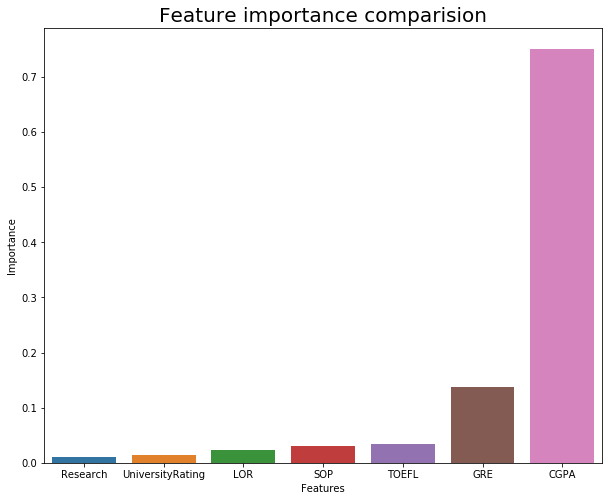

In [146]:
# important features
Admission_data_features = Admission_data.drop(labels='Chance', axis=1)
Columns =  list(Admission_data_features.columns)
feature_results = pd.DataFrame({'feature': Columns, 
                                'importance': final_model.feature_importances_})
feature_results = feature_results.sort_values('importance')
fig = plt.figure(figsize=(10,8))
sns.barplot(x='feature',y='importance',data=feature_results)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature importance comparision', size = 20)

In [147]:
# # Use Feature Importances for Feature Selection

# Extract the names of the most important features
most_important_features = feature_results['feature'][:10]

# Find the index that corresponds to each feature name
indices = [list(Admission_data.columns).index(x) for x in most_important_features]

# Keep only the most important features
X_train_reduced = X_train[:, indices]
X_test_reduced = X_test[:, indices]

print('Most important training features shape: ', X_train_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)
# Here we have less features in dataset so feature selection may be not much important

Most important training features shape:  (400, 7)
Most important testing  features shape:  (100, 7)
